In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy
import scipy.optimize as opt
from scipy.integrate import odeint
from scipy.misc import derivative

In [2]:
#  Constants and Definitions

redshift = np.arange(0,2.,0.01)
scale_factor = np.linspace(0.001,1,100000)

In [3]:
#  Colors

colormap = plt.cm.Spectral
colorst = [colormap(i) for i in np.linspace(0, 1., 5)] 

In [4]:
#  Reading the data of H(z)

z_Hz, Hz, Hz_err = np.loadtxt('data/Hz.txt', usecols=(0,1,2), unpack=True)

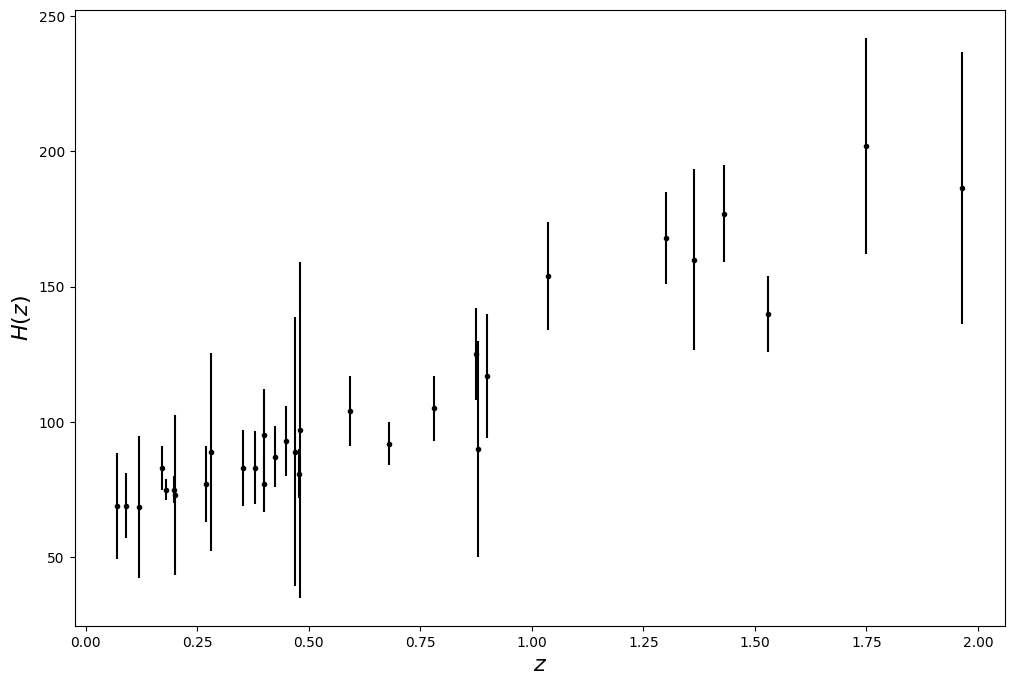

In [5]:
#  Plot: H(z) Data

plt.subplots(figsize=(12, 8))
plt.xlabel(r'$z$',fontsize=16)
plt.ylabel(r'$H(z)$',fontsize=16)

plt.errorbar(z_Hz, Hz, yerr=Hz_err, linestyle='', marker='.',color='black')

plt.show()

The graph allows us to visualize how the universe's expansion rate has varied over time. Generally, H(z) increases with redshift, indicating that the universe is expanding more rapidly when the value of z is higher.

In [6]:
# Definition of the Hubble parameter for a single fluid

def Hubble_one(H0,w,z):
    H = H0 * (1. + z)**(3 * (1. + w) / 2)
    return(H)

$$H(z)=H_0(1+z)^{\frac{3(1+w)}{2}}$$

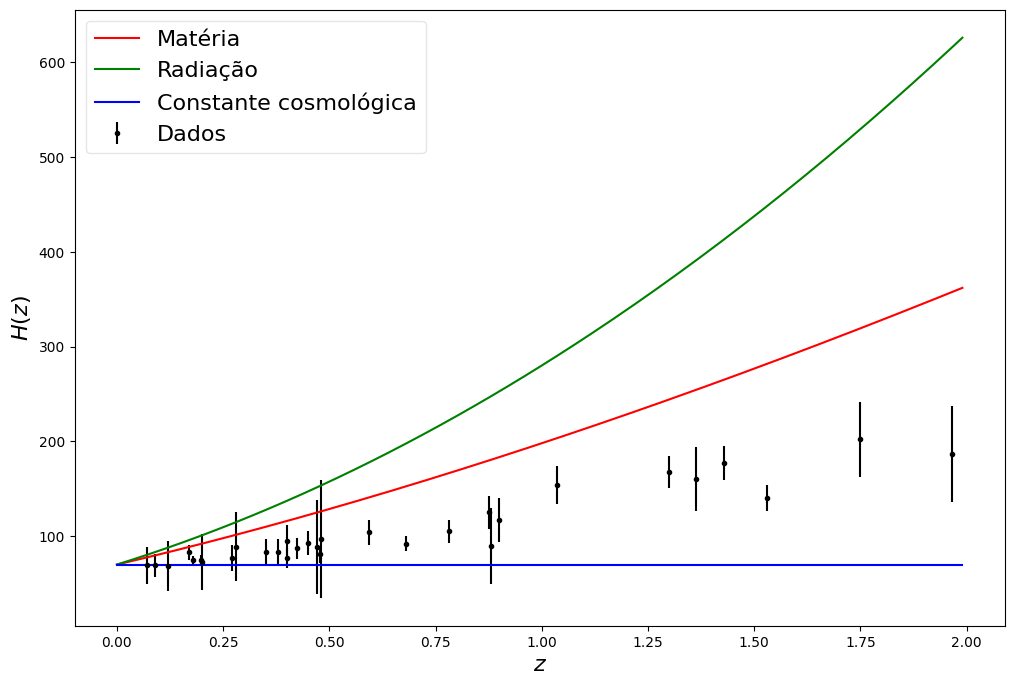

In [7]:
# Plot: Comparison of H(z) Data with Theoretical Predictions for Universes Composed Only of:

#1. Cosmological Constant (w = -1);
#2. Matter (w = 0);
#3. Radiation (w = 1/3);

plt.subplots(figsize=(12, 8))
plt.xlabel(r'$z$',fontsize=16)
plt.ylabel(r'$H(z)$',fontsize=16)

plt.errorbar(z_Hz, Hz, yerr=Hz_err, linestyle='', marker='.',color='black', label = r'Dados')

plt.plot(redshift, Hubble_one(70,0,redshift),color='red', label = r'Matéria')
plt.plot(redshift, Hubble_one(70,1./3.,redshift),color='green', label = r'Radiação')
plt.plot(redshift, Hubble_one(70,-1,redshift),color='blue', label = r'Constante cosmológica')

legend = plt.legend(loc='best',fontsize=16)
legend.get_frame().set_alpha(0.5)

This graph presents three theoretical predictions for H(z), based on different types of fluids that dominate the universe: matter (red), radiation (green), and cosmological constant (blue). However, none of these predictions fit the observational data adequately.

In [8]:
# Definition of the Hubble Parameter for Two Fluids

def Hubble_two(H0,Om1,w1,w2,z):
    H = H0 * np.sqrt(Om1 * (1. + z)**(3. * (1. + w1)) + (1. - Om1) * (1. + z)**(3. * (1. + w2)))
    return(H)

$$H(z)=H_0\sqrt{\Omega_1(1+z)^{3(1+w_1)}+(1-\Omega_1)(1+z)^{3(1+w_2)}}$$

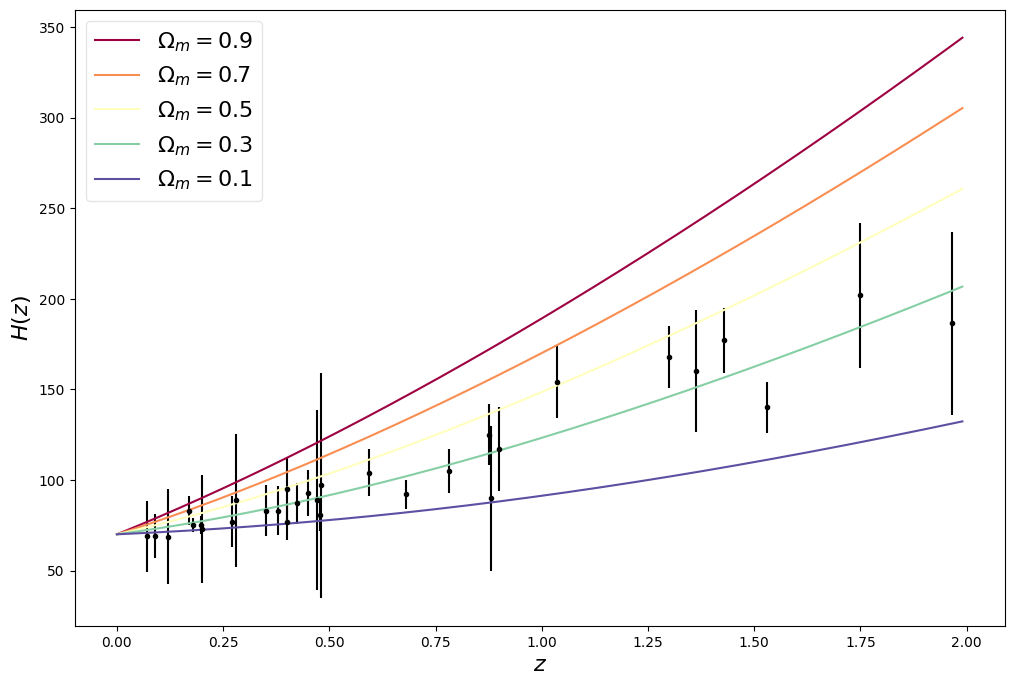

In [9]:
#  Plot: Comparison of H(z) Data with Theoretical Predictions for the Universe Composed of Matter and Cosmological Constant:

plt.subplots(figsize=(12, 8))
plt.xlabel(r'$z$',fontsize=16)
plt.ylabel(r'$H(z)$',fontsize=16)

plt.errorbar(z_Hz, Hz, yerr=Hz_err, linestyle='', marker='.',color='black')

plt.plot(redshift, Hubble_two(70,0.9,0,-1,redshift),color=colorst[0], label = r'$\Omega_m = 0.9$')
plt.plot(redshift, Hubble_two(70,0.7,0,-1,redshift),color=colorst[1], label = r'$\Omega_m = 0.7$')
plt.plot(redshift, Hubble_two(70,0.5,0,-1,redshift),color=colorst[2], label = r'$\Omega_m = 0.5$')
plt.plot(redshift, Hubble_two(70,0.3,0,-1,redshift),color=colorst[3], label = r'$\Omega_m = 0.3$')
plt.plot(redshift, Hubble_two(70,0.1,0,-1,redshift),color=colorst[4], label = r'$\Omega_m = 0.1$')

legend = plt.legend(loc='best',fontsize=16)
legend.get_frame().set_alpha(0.5)

In [10]:
#  Chi2

def Chi2(H0,Om1,w1,w2):
    chi2 = 0
    for i in range(0,len(z_Hz)):
        chi2 += (Hubble_two(H0,Om1,w1,w2,z_Hz[i]) - Hz[i])**2 / (Hz_err[i])**2
    return chi2

$$\chi^{2}=\dfrac{\left(H^{\rm obs}_i-H^{teo}(z_i)\right)^{2}}{\sigma^{2}}=\dfrac{\left(H^{\rm obs}_i-H_0\sqrt{1-\Omega_m+\Omega_m(1+z_i)^3}\right)^{2}}{\sigma^{2}}$$

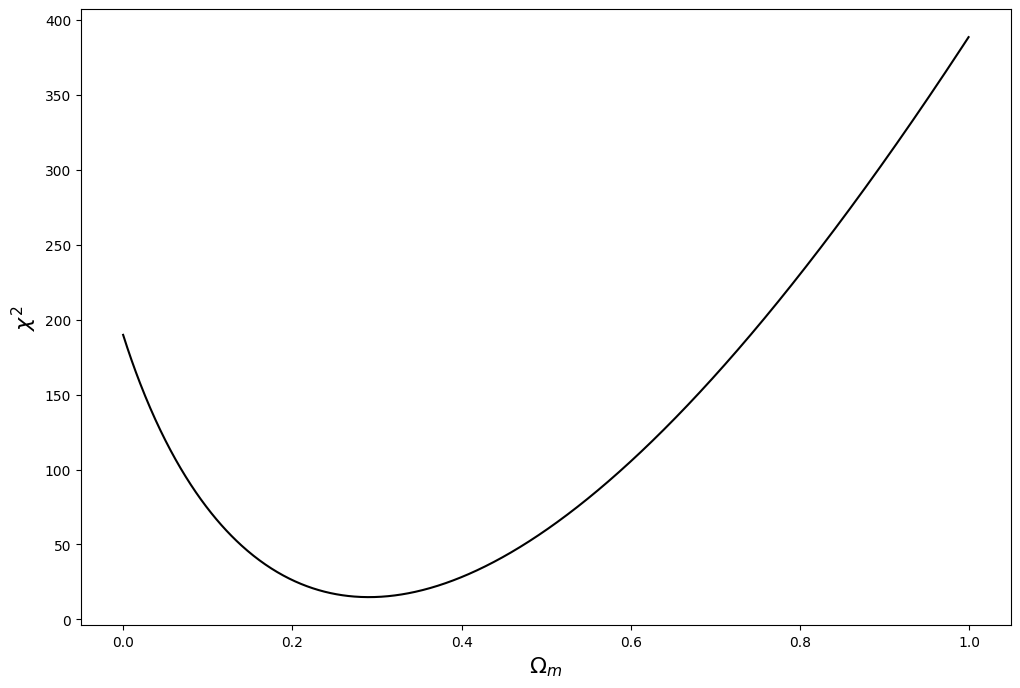

In [11]:
#  Plot: Chi2

om = np.arange(0,1,0.001)

plt.subplots(figsize=(12, 8))

plt.xlabel(r'$\Omega_m$',fontsize=16)
plt.ylabel(r'$\chi^{2}$',fontsize=16)

plt.plot(om,Chi2(70,om,0,-1), color='black')

plt.show()

The minimum value indicates the best fit of the data to the theoretical model. The graph shows that the best fit occurs around Omega_m = 0.29, suggesting that about 29% of the universe's energy content is composed of matter, which is consistent with the standard model of cosmology (ΛCDM).

In [12]:
#  Best Fit

chi2 = interpolate.interp1d(om, Chi2(70,om,0,-1))
om_bestfit = opt.fmin(chi2, 0.3, disp=False)[0]

print(opt.fmin(chi2, 0.3, disp=False)[0])
print(Chi2(70,opt.fmin(chi2, 0.3, disp=False)[0],0,-1))

0.2900390625
14.867903188421002


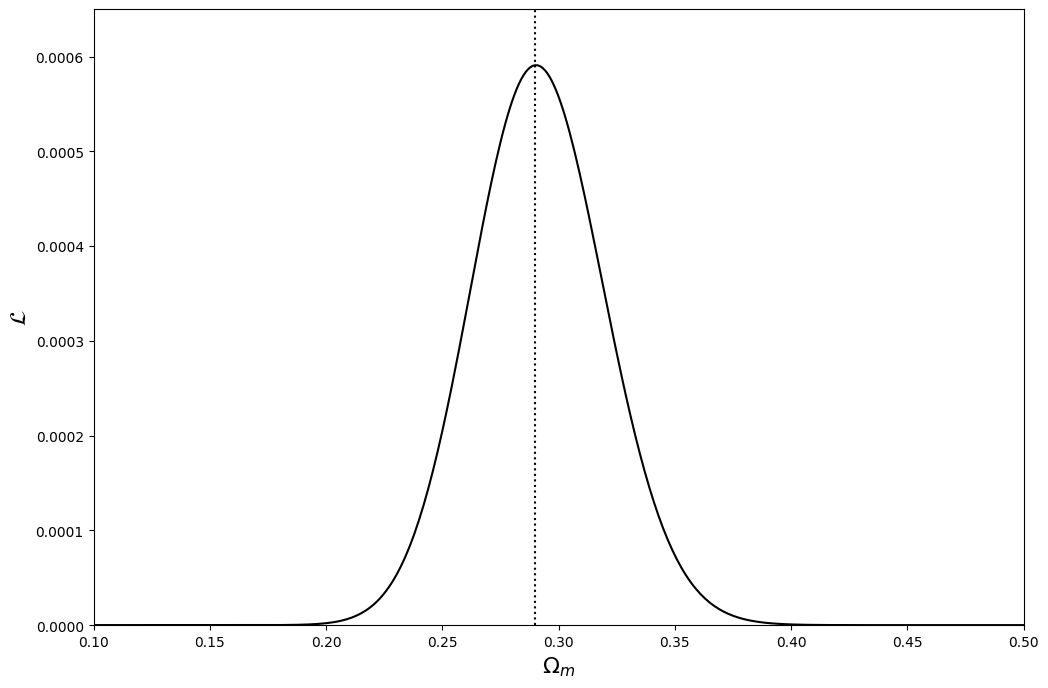

In [13]:
#  Plot: Probability

plt.subplots(figsize=(12, 8))
plt.xlabel(r'$\Omega_m$',fontsize=16)
plt.ylabel(r'$\mathcal{L}$',fontsize=16)
plt.ylim(0,0.00065)
plt.xlim(0.1,0.5)

plt.plot(om,np.exp(-Chi2(70,om,0,-1)/2), color='black')
plt.axvline(x=om_bestfit,color='black',linestyle=':')

plt.show()

In [14]:
#  Likelihood

def log_likelihood(H0,Om1,w1,w2):
    lnL = -0.5 * Chi2(H0,Om1,w1,w2)
    return(lnL)

In [15]:
#  Prior

def log_prior(H0,Om1,w1,w2):
    if 0. < Om1 < 1.:
        return 0.0
    return -np.inf

In [16]:
#  Posterior

def log_posterior(H0,Om1,w1,w2):
    lp = log_prior(H0,Om1,w1,w2)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(H0,Om1,w1,w2)

In [17]:
# MCMC: Proposal of a New Point

def proposal(p,sigma_om):
    return(p+np.random.normal(size=p.size) * np.array([sigma_om]))

In [18]:
#  MCMC: Metropolis-Hastings sampling

p = np.array([0.29])
Lp = log_posterior(70,p,0,-1)


N = 200000
chain = np.zeros(N)
likes = np.zeros(N)

weights = [0]
param_weight = np.array([0])

acc = 0
for i in range(N):
    q = proposal(p,0.01)
    Lq = log_posterior(70,q,0,-1)
    
    if (Lq > Lp) or (Lq - Lp) > np.log(np.random.uniform()):
        p = q
        Lp = Lq
        acc += 1
        weights.append(1)
        param_weight = np.vstack([param_weight,p])
    else:
        index = len(weights)-1
        weights[index] += 1
    
    chain[i] = p
    likes[i] = Lp
    
print("Acceptance ratio",acc/N) 

Acceptance ratio 0.88799


In [19]:
#  Results: Mean and Standard Deviation

print("Mean:", scipy.mean(chain))
print("Standard deviation:", scipy.std(chain))

Mean: 0.29100601997935277
Standard deviation: 0.028637522647833424


/tmp/ipykernel_39122/2852381735.py:3: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  print("Mean:", scipy.mean(chain))
/tmp/ipykernel_39122/2852381735.py:4: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  print("Standard deviation:", scipy.std(chain))


(0.1, 0.5)

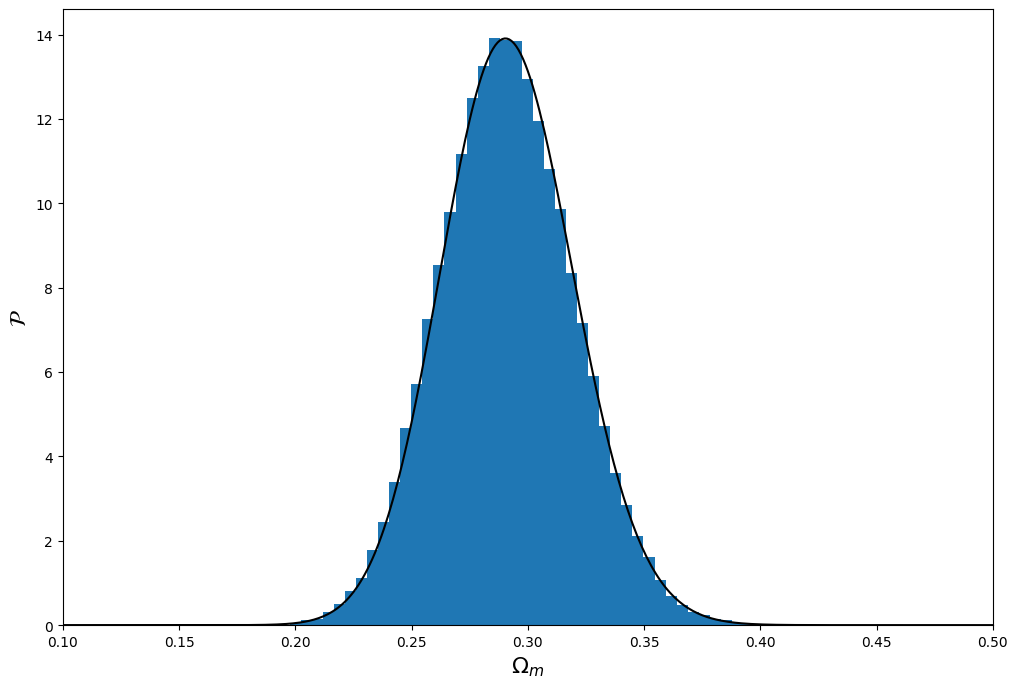

In [20]:
#  Plot: Comparison (Analytical Result vs. MCMC)
plt.subplots(figsize=(12, 8))
plt.xlabel(r'$\Omega_m$',fontsize=16)
plt.ylabel(r'$\mathcal{P}$',fontsize=16)
plt.hist(chain[1000:],bins=50, density=True)

normalization = np.histogram(chain[1000:],bins=50, density=True)[0].max() / np.exp(-Chi2(70,om,0,-1)/2).max()

plt.plot(om,normalization * np.exp(-Chi2(70,om,0,-1)/2), color='black')
plt.xlim(0.1,0.5)

In [21]:
#  Differential Equation for Delta with Different Values of Omega_m

def delta_m_1(delta,a):
    om = 0.1
    return(delta[1],-3./a * delta[1] * (1. - (om / a**3) / (2.* ((om / a**3) + 1. - om))) + 3. / (2. * a**2) * delta[0] * ((om / a**3) / ((om / a**3) + 1. - om)))

def delta_m_2(delta,a):
    om = 0.3
    return(delta[1],-3./a * delta[1] * (1. - (om / a**3) / (2.* ((om / a**3) + 1. - om))) + 3. / (2. * a**2) * delta[0] * ((om / a**3) / ((om / a**3) + 1. - om)))

def delta_m_3(delta,a):
    om = 0.5
    return(delta[1],-3./a * delta[1] * (1. - (om / a**3) / (2.* ((om / a**3) + 1. - om))) + 3. / (2. * a**2) * delta[0] * ((om / a**3) / ((om / a**3) + 1. - om)))

def delta_m_4(delta,a):
    om = 0.7
    return(delta[1],-3./a * delta[1] * (1. - (om / a**3) / (2.* ((om / a**3) + 1. - om))) + 3. / (2. * a**2) * delta[0] * ((om / a**3) / ((om / a**3) + 1. - om)))

def delta_m_5(delta,a):
    om = 0.9
    return(delta[1],-3./a * delta[1] * (1. - (om / a**3) / (2.* ((om / a**3) + 1. - om))) + 3. / (2. * a**2) * delta[0] * ((om / a**3) / ((om / a**3) + 1. - om)))

$$\delta^{\prime\prime}_m+\dfrac{3}{a}\left[1-\dfrac{\Omega_m a^{-3}}{2\left(1-\Omega_m+\Omega_m a^{-3}\right)}\right]\delta^{\prime}_m-\dfrac{3}{2a^{2}}\left(\dfrac{\Omega_m a^{-3}}{1-\Omega_m+\Omega_m a^{-3}}\right)\delta_m=0$$

In [22]:
#  Numerical Solution of the Differential Equations for Delta

delta0 = [0.001,0.01]

delta_1 = odeint(delta_m_1,delta0,scale_factor)[:,0]
delta_2 = odeint(delta_m_2,delta0,scale_factor)[:,0]
delta_3 = odeint(delta_m_3,delta0,scale_factor)[:,0]
delta_4 = odeint(delta_m_4,delta0,scale_factor)[:,0]
delta_5 = odeint(delta_m_5,delta0,scale_factor)[:,0]

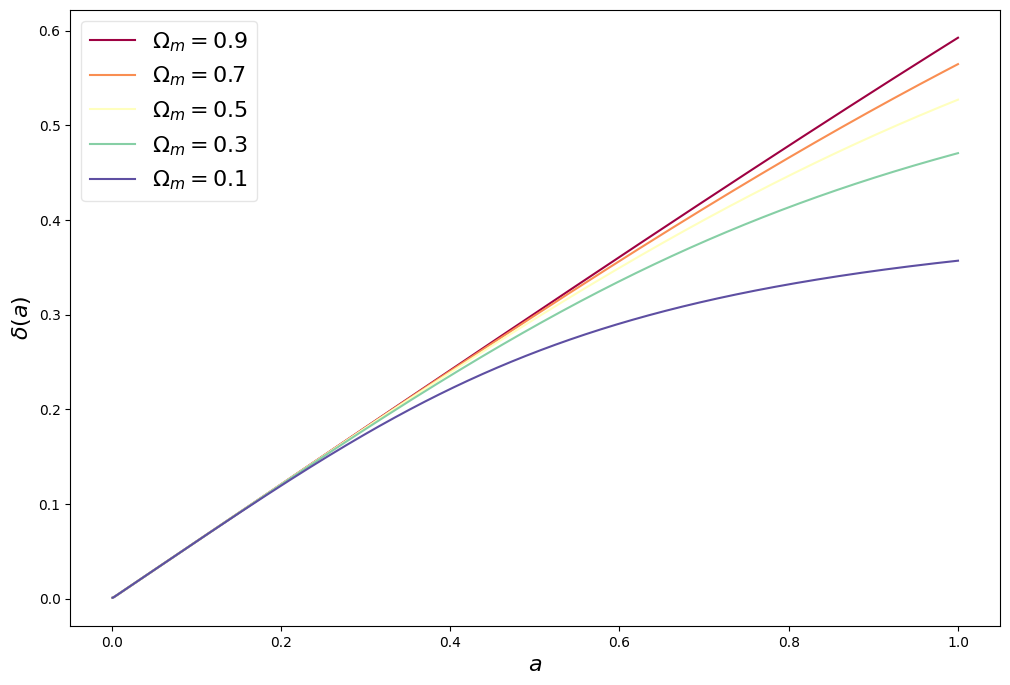

In [23]:
#  Plot: Delta

plt.subplots(figsize=(12, 8))
plt.xlabel(r'$a$',fontsize=16)
plt.ylabel(r'$\delta(a)$',fontsize=16)

plt.plot(scale_factor, delta_5,color=colorst[0], label = r'$\Omega_m = 0.9$')
plt.plot(scale_factor, delta_4,color=colorst[1], label = r'$\Omega_m = 0.7$')
plt.plot(scale_factor, delta_3,color=colorst[2], label = r'$\Omega_m = 0.5$')
plt.plot(scale_factor, delta_2,color=colorst[3], label = r'$\Omega_m = 0.3$')
plt.plot(scale_factor, delta_1,color=colorst[4], label = r'$\Omega_m = 0.1$')

legend = plt.legend(loc='best',fontsize=16)
legend.get_frame().set_alpha(0.5)

The graph shows that the growth of density fluctuations strongly depends on the matter density in the universe. Universes with higher  Omega_m (more matter) exhibit a faster growth of fluctuations, favoring the formation of structures such as galaxies and clusters. Conversely, in universes with lower matter density Omega_m, the density fluctuations grow more slowly, delaying the formation of these structures.

In [24]:
#  Calculation of the Growth Function D

D1 = interpolate.interp1d(scale_factor,delta_1/delta_1[-1])
D2 = interpolate.interp1d(scale_factor,delta_2/delta_2[-1])
D3 = interpolate.interp1d(scale_factor,delta_3/delta_3[-1])
D4 = interpolate.interp1d(scale_factor,delta_4/delta_4[-1])
D5 = interpolate.interp1d(scale_factor,delta_5/delta_5[-1])

$$D(a)\equiv\dfrac{\delta(a)}{\delta(a=1)}$$

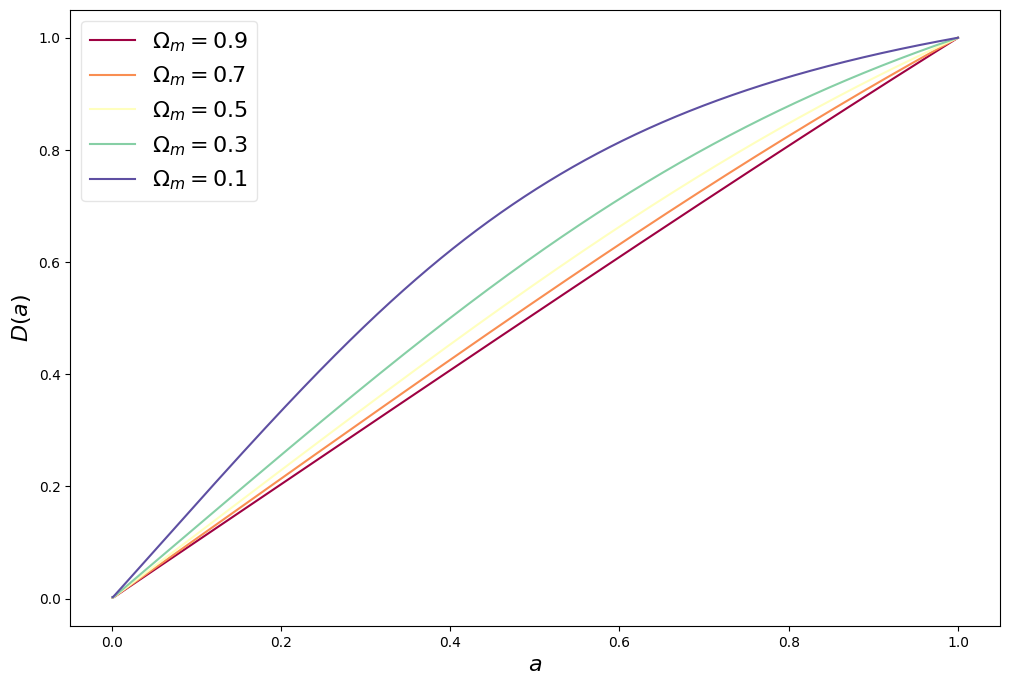

In [25]:
#  Plot: Growth Function

plt.subplots(figsize=(12, 8))
plt.xlabel(r'$a$',fontsize=16)
plt.ylabel(r'$D(a)$',fontsize=16)

plt.plot(scale_factor, D5(scale_factor),color=colorst[0], label = r'$\Omega_m = 0.9$')
plt.plot(scale_factor, D4(scale_factor),color=colorst[1], label = r'$\Omega_m = 0.7$')
plt.plot(scale_factor, D3(scale_factor),color=colorst[2], label = r'$\Omega_m = 0.5$')
plt.plot(scale_factor, D2(scale_factor),color=colorst[3], label = r'$\Omega_m = 0.3$')
plt.plot(scale_factor, D1(scale_factor),color=colorst[4], label = r'$\Omega_m = 0.1$')

legend = plt.legend(loc='best',fontsize=16)
legend.get_frame().set_alpha(0.5)

The graph confirms that the value of Omega_m  strongly influences the behavior of the growth function. Higher values of Omega_m lead to a faster growth of structures on cosmological scales in the early universe, while lower values of Omega_m indicate that structures grow more slowly as the universe evolves.

In [26]:
#  Calculation of the Growth Function f

log_D1 = interpolate.interp1d(scale_factor,np.log(D1(scale_factor)))
f1 = interpolate.interp1d(scale_factor[1:-1],derivative(log_D1, scale_factor[1:-1], dx=1e-6)*scale_factor[1:-1]);
log_D2 = interpolate.interp1d(scale_factor,np.log(D2(scale_factor)))
f2 = interpolate.interp1d(scale_factor[1:-1],derivative(log_D2, scale_factor[1:-1], dx=1e-6)*scale_factor[1:-1]);
log_D3 = interpolate.interp1d(scale_factor,np.log(D3(scale_factor)))
f3 = interpolate.interp1d(scale_factor[1:-1],derivative(log_D3, scale_factor[1:-1], dx=1e-6)*scale_factor[1:-1]);
log_D4 = interpolate.interp1d(scale_factor,np.log(D4(scale_factor)))
f4 = interpolate.interp1d(scale_factor[1:-1],derivative(log_D4, scale_factor[1:-1], dx=1e-6)*scale_factor[1:-1]);
log_D5 = interpolate.interp1d(scale_factor,np.log(D5(scale_factor)))
f5 = interpolate.interp1d(scale_factor[1:-1],derivative(log_D5, scale_factor[1:-1], dx=1e-6)*scale_factor[1:-1]);

$$f(a)\equiv\dfrac{d\ln(D)}{d\ln(a)}=\dfrac{1}{a}\dfrac{d\ln(D)}{da}$$

In [27]:
# Reading the data of f(z)

z_fz, fz, fz_err = np.loadtxt('data/f.txt', usecols=(0,1,2), unpack=True)

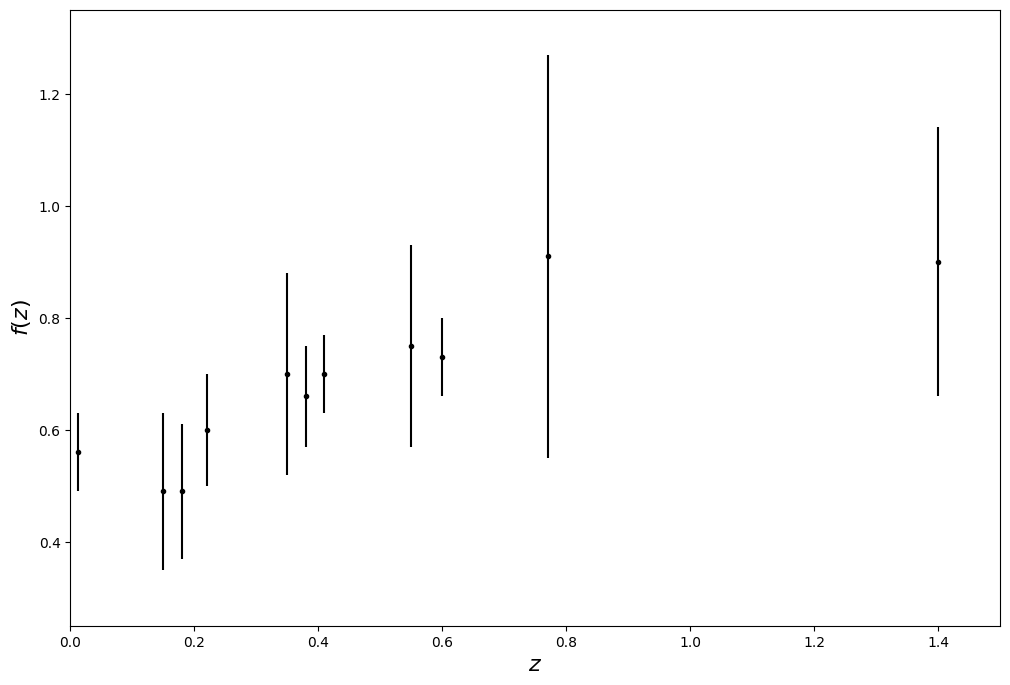

In [28]:
# Plot: f(z) Data

plt.subplots(figsize=(12, 8))
plt.xlabel(r'$z$',fontsize=16)
plt.ylabel(r'$f(z)$',fontsize=16)
plt.xlim(0,1.5)
plt.ylim(0.25,1.35)

plt.errorbar(z_fz, fz, yerr=fz_err, linestyle='', marker='.',color='black')

plt.show()

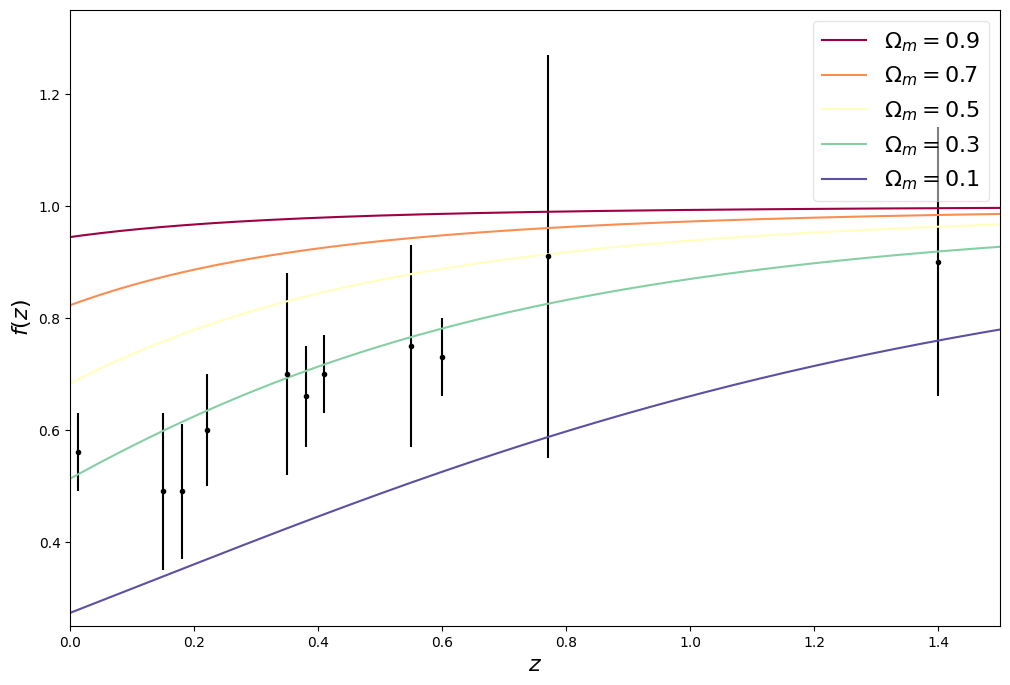

In [29]:
# Plot: Comparison of f(z) Data with Theoretical Predictions for the Universe Composed of Matter and Cosmological Constant: 

plt.subplots(figsize=(12, 8))
plt.xlabel(r'$z$',fontsize=16)
plt.ylabel(r'$f(z)$',fontsize=16)
plt.xlim(0,1.5)
plt.ylim(0.25,1.35)

plt.errorbar(z_fz, fz, yerr=fz_err, linestyle='', marker='.',color='black')

plt.plot(1/scale_factor[1:-1]-1,f5(scale_factor[1:-1]),color=colorst[0], label = r'$\Omega_m = 0.9$')
plt.plot(1/scale_factor[1:-1]-1,f4(scale_factor[1:-1]),color=colorst[1], label = r'$\Omega_m = 0.7$')
plt.plot(1/scale_factor[1:-1]-1,f3(scale_factor[1:-1]),color=colorst[2], label = r'$\Omega_m = 0.5$')
plt.plot(1/scale_factor[1:-1]-1,f2(scale_factor[1:-1]),color=colorst[3], label = r'$\Omega_m = 0.3$')
plt.plot(1/scale_factor[1:-1]-1,f1(scale_factor[1:-1]),color=colorst[4], label = r'$\Omega_m = 0.1$')

legend = plt.legend(loc='best',fontsize=16)
legend.get_frame().set_alpha(0.5)

The graph supports the standard model with Omega_m around 0.3 as the best approximation to the observed data.